<a href="https://colab.research.google.com/github/geovanebausentsi-cloud/Agentes_de_IA_Google_Gemini/blob/main/Imers%C3%A3o_Agentes_de_IA_Alura_%2B_Google_GeminiEdicaoDoAgenteGarcon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01

In [2]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.0 MB/s eta 0:00:00


Importação da API Key

In [34]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

Conexão com o Gemini

In [35]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

In [5]:
resp_test = llm.invoke("Me ajude com um modelo para gerenciar o atendimento do meu restaurante ")
print(resp_test.content)

Excelente! Gerenciar o atendimento em um restaurante é crucial para o sucesso. Um bom modelo não só padroniza a experiência, mas também permite melhorias contínuas.

Aqui está um modelo abrangente para gerenciar o atendimento do seu restaurante, dividido em pilares e etapas:

---

**Modelo Abrangente para Gestão do Atendimento ao Cliente em Restaurantes**

**Objetivo:** Criar uma experiência memorável e consistente para o cliente, desde o primeiro contato até a saída, incentivando a fidelidade e o boca a boca positivo.

---

**Pilar 1: Cultura de Serviço e Equipe**

Este é o alicerce de tudo. Sem uma equipe engajada e uma cultura focada no cliente, nenhum processo funcionará perfeitamente.

1.  **Definição da Visão de Serviço:**
    *   **Missão de Atendimento:** Qual é a promessa do seu restaurante em termos de serviço? (Ex: "Encantar cada cliente com hospitalidade genuína e atenção aos detalhes.")
    *   **Valores de Atendimento:** Quais são os princípios que guiam a equipe? (Ex: Co

In [36]:
TRIAGEM_PROMPT = (
    "Você é um bot de atendimento especializado para o Restaurante [Santo Japa]. Sua função é triar as solicitações dos clientes, entendendo a intenção para direcionar a melhor resposta. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Use esta opção quando a solicitação for uma pergunta clara e direta sobre o cardápio, horários, localização, ou informações que podem ser respondidas automaticamente.Exemplos: "Qual o horário de funcionamento?", "Vocês têm opções veganas?", "Qual o preço do Sashimi?", "Onde fica o restaurante?"\n'
    '- **PEDIR_INFO**:  Use para mensagens vagas, incompletas ou que precisam de mais detalhes para serem compreendidas, como pedidos de itens que não estão no cardápio ou perguntas sobre a disponibilidade de um produto no estoque, duvidas sobre a entrega. Exemplos: "Quero pedir um prato", "Vocês têm bebida?", "Preciso de ajuda com o meu pedido."\n'
    '- **ABRIR_CHAMADO**: Use esta opção para pedidos complexos que exigem interação humana, como reservas, problemas com um pedido já feito, reclamações, ou solicitações de personalização de um prato.Exemplos: "Gostaria de fazer uma reserva para 5 pessoas.", "Meu pedido chegou errado.", "Quero falar com um gerente.","Gostaria de um prato sem glúten e sem lactose."'
)

In [37]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    campos_faltantes: List[str] = Field(default_factory=list)

In [38]:
llm_triagem = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

In [39]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem(mensagem: str) -> Dict:
    saida: TriagemOut = triagem_chain.invoke([
        SystemMessage(content=TRIAGEM_PROMPT),
        HumanMessage(content=mensagem)
    ])

    return saida.model_dump()

In [40]:
testes = ["Quais os horários de funcionamento?",
          "Vocês têm pratos vegetarianos?",
          "Quero pedir um hambúrguer.",
          "Estou com uma dúvida sobre um pedido.",
          "Gostaria de fazer uma reserva para amanhã à noite.",
          "Meu pedido veio com o molho errado, preciso de ajuda.",
          "vocês tem hot? quanto custa?",
           "Quero um prato sem alho por favor, tenho alergia.",
          "O que vem no Ceviche de peixes e frutos do mar?"
          ]

In [41]:
for msg_teste in testes:
    print(f"Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n")

Pergunta: Quais os horários de funcionamento?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Vocês têm pratos vegetarianos?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero pedir um hambúrguer.
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': ['item_do_cardapio']}

Pergunta: Estou com uma dúvida sobre um pedido.
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Gostaria de fazer uma reserva para amanhã à noite.
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Meu pedido veio com o molho errado, preciso de ajuda.
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'ALTA', 'campos_faltantes': []}

Pergunta: vocês tem hot? quanto custa?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero um prato sem a

# Aula 02

In [42]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

In [43]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

for n in Path("/content/").glob("*.pdf"):
    try:
        loader = PyMuPDFLoader(str(n))
        docs.extend(loader.load())
        print(f"Carregado com sucesso arquivo {n.name}")
    except Exception as e:
        print(f"Erro ao carregar arquivo {n.name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

Carregado com sucesso arquivo cardapioJson.pdf
Total de documentos carregados: 18


In [44]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)

Separando chucks

In [45]:
for chunk in chunks:
    print(chunk)
    print("------------------------------------")

page_content='{ 
  "nome_restaurante": "Santo Japa Sushibar", 
  "status": "Loja Fechada", 
  "avaliacao": "4.8 estrelas", 
  "entrega": { 
    "minimo_pedido": "R$ 0.00", 
    "taxa_entrega": "R$ 12.00", 
    "tempo_estimado": "60-90min" 
  }, 
  "categorias": [ 
    { 
      "nome_categoria": "Entradas",' metadata={'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/cardapioJson.pdf', 'file_path': '/content/cardapioJson.pdf', 'total_pages': 18, 'format': 'PDF 1.4', 'title': 'Documento sem título', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
------------------------------------
page_content='"itens": [ 
        { 
          "nome_produto": "Carpaccio de salmão 10 UN", 
          "descricao": "Gravlax ou Gravad lax significa, em sueco, “salmão enterrado”. É prato 
muito comum em toda a Escandinávia (Suécia, Noruega, Finlândia e Dinamarca, atingindo' metadata

Modell for embeddings:

In [87]:


from langchain_community.embeddings import HuggingFaceEmbeddings

# Carregar um modelo de embedding gratuito do Hugging Face
# Exemplo: 'sentence-transformers/all-MiniLM-L6-v2' é um modelo popular e eficiente
# Você pode explorar outros modelos no Hugging Face Hub
model_name = "sentence-transformers/all-MiniLM-L6-v2"
embeddings = HuggingFaceEmbeddings(model_name=model_name)

print(f"Usando modelo de embeddings do Hugging Face: {model_name}")

/tmp/ipython-input-2633152076.py:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=model_name)


Usando modelo de embeddings do Hugging Face: sentence-transformers/all-MiniLM-L6-v2


Biblioteca do facebook para assimilar os embandings:

In [88]:
from langchain_community.vectorstores import FAISS

# Criar o vetorstore FAISS a partir dos chunks e do objeto embeddings (HuggingFaceEmbeddings)
# Certifique-se de que a célula anterior (LkxrYFKG4dqV) que define 'embeddings' foi executada.
vectorstore = FAISS.from_documents(chunks, embeddings)

retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3, "k": 4})
                                            # score_threshold: 0 a 1 = qt > limite = + restrição
                                            # K: tamnho do chunk.

print("Vetorstore FAISS criado com sucesso usando o novo modelo de embeddings.")

Vetorstore FAISS criado com sucesso usando o novo modelo de embeddings.


Definção do prompt de sistema:

In [89]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

In [90]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

In [93]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados})

    txt = (answer or "").strip()

    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

In [92]:
testes =  ["Quais os horários de funcionamento?",
          "Vocês têm pratos vegetarianos?",
          "Quero pedir um hambúrguer.",
          "Estou com uma dúvida sobre um pedido.",
          "Gostaria de fazer uma reserva para amanhã à noite.",
          "Meu pedido veio com o molho errado, preciso de ajuda.",
          "vocês tem hot? quanto custa?",
           "Quero um prato sem alho por favor, tenho alergia.",
          "O que vem no Ceviche de peixes e frutos do mar?"
          ]

In [94]:
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print("CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

PERGUNTA: Quais os horários de funcionamento?
RESPOSTA: Não sei.


PERGUNTA: Vocês têm pratos vegetarianos?
RESPOSTA: Não sei.
PERGUNTA: Quero pedir um hambúrguer.
RESPOSTA: Não sei.


PERGUNTA: Estou com uma dúvida sobre um pedido.
RESPOSTA: Não sei.
PERGUNTA: Gostaria de fazer uma reserva para amanhã à noite.
RESPOSTA: Não sei.
PERGUNTA: Meu pedido veio com o molho errado, preciso de ajuda.
RESPOSTA: Não sei.


PERGUNTA: vocês tem hot? quanto custa?
RESPOSTA: Não sei.
PERGUNTA: Quero um prato sem alho por favor, tenho alergia.
RESPOSTA: Não sei.
PERGUNTA: O que vem no Ceviche de peixes e frutos do mar?
RESPOSTA: Marinado de peixes e marisco, limão siciliano, laranja, gengibre, pimenta.
CITAÇÕES:
 - Documento: cardapioJson.pdf, Página: 2
   Trecho: reino, molho de ostra, pimenta biquinho, cebola roxa, coentro, azeite.", "preco": 42.00 }, { "nome_produto": "Ceviche de peixes e frutos do mar", "descricao": "Marinado de peixes e marisco, limão siciliano, laranja, gengibre, pime
------------------------------------


# Aula 03

In [95]:
!pip install -q --upgrade langgraph

In [96]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
    pergunta: str
    triagem: dict
    resposta: Optional[str]
    citacoes: List[dict]
    rag_sucesso: bool
    acao_final: str

In [97]:
def node_triagem(state: AgentState) -> AgentState:
    print("Executando nó de triagem...")
    return {"triagem": triagem(state["pergunta"])}

In [98]:
def node_auto_resolver(state: AgentState) -> AgentState:
    print("Executando nó de auto_resolver...")
    resposta_rag = perguntar_politica_RAG(state["pergunta"])

    update: AgentState = {
        "resposta": resposta_rag["answer"],
        "citacoes": resposta_rag.get("citacoes", []),
        "rag_sucesso": resposta_rag["contexto_encontrado"],
    }

    if resposta_rag["contexto_encontrado"]:
        update["acao_final"] = "AUTO_RESOLVER"

    return update

In [99]:
def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de pedir_info...")
    faltantes = state["triagem"].get("campos_faltantes", [])
    if faltantes:
        detalhe = ",".join(faltantes)
    else:
        detalhe = "Tema e contexto específico"

    return {
        "resposta": f"Para avançar, preciso que detalhe: {detalhe}",
        "citacoes": [],
        "acao_final": "PEDIR_INFO"
    }

In [100]:
def node_abrir_chamado(state: AgentState) -> AgentState:
    print("Executando nó de abrir_chamado...")
    triagem = state["triagem"]

    return {
        "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}",
        "citacoes": [],
        "acao_final": "ABRIR_CHAMADO"
    }

In [101]:
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

def decidir_pos_triagem(state: AgentState) -> str:
    print("Decidindo após a triagem...")
    decisao = state["triagem"]["decisao"]

    if decisao == "AUTO_RESOLVER": return "auto"
    if decisao == "PEDIR_INFO": return "info"
    if decisao == "ABRIR_CHAMADO": return "chamado"

In [102]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print("Decidindo após o auto_resolver...")

    if state.get("rag_sucesso"):
        print("Rag com sucesso, finalizando o fluxo.")
        return "ok"

    state_da_pergunta = (state["pergunta"] or "").lower()

    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        print("Rag falhou, mas foram encontradas keywords de abertura de ticket. Abrindo...")
        return "chamado"

    print("Rag falhou, sem keywords, vou pedir mais informações...")
    return "info"

In [103]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto": "auto_resolver",
    "info": "pedir_info",
    "chamado": "abrir_chamado"
})

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "info": "pedir_info",
    "chamado": "abrir_chamado",
    "ok": END
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()

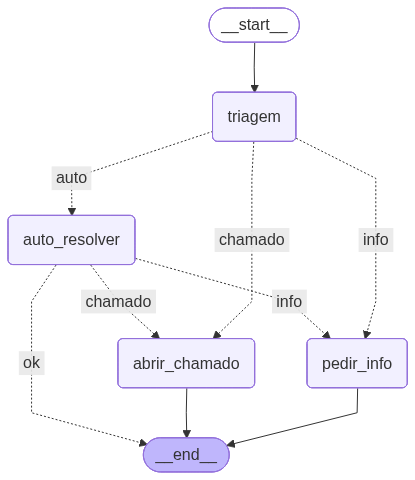

In [104]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

In [105]:
testes = ["Quais os horários de funcionamento?",
          "Vocês têm pratos vegetarianos?",
          "Quero pedir um hambúrguer.",
          "Estou com uma dúvida sobre um pedido.",
          "Gostaria de fazer uma reserva para amanhã à noite.",
          "Meu pedido veio com o molho errado, preciso de ajuda.",
          "vocês tem hot? quanto custa?",
           "Quero um prato sem alho por favor, tenho alergia.",
          "O que vem no Ceviche de peixes e frutos do mar?"
          ]

In [106]:
for msg_test in testes:
    resposta_final = grafo.invoke({"pergunta": msg_test})

    triag = resposta_final.get("triagem", {})
    print(f"PERGUNTA: {msg_test}")
    print(f"DECISÃO: {triag.get('decisao')} | URGÊNCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")
    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")

Executando nó de triagem...


Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag falhou, sem keywords, vou pedir mais informações...
Executando nó de pedir_info...
PERGUNTA: Quais os horários de funcionamento?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO
RESPOSTA: Para avançar, preciso que detalhe: Tema e contexto específico
------------------------------------
Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag falhou, sem keywords, vou pedir mais informações...
Executando nó de pedir_info...
PERGUNTA: Vocês têm pratos vegetarianos?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO
RESPOSTA: Para avançar, preciso que detalhe: Tema e contexto específico
------------------------------------
Executando nó de triagem...
Decidindo após a triagem...
Executando nó de pedir_info...
PERGUNTA: Quero pedir um hambúrguer.
DECISÃO: PEDIR_INFO | URGÊNCIA: BAIXA | AÇÃO 

  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 24
}
].


Decidindo após a triagem...
Executando nó de auto_resolver...


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 22
}
]

Erro 429 no modelo por conta da taxa de uso do modelo de embandings, o modelo não esta trazendo informações obvia citadas no jsom como horário de funcionamento, não sei dizer se é por conta do embadings mais preciso e pela substitituição por outra biblioteca ou erros na lógica do código.
